In [1]:
import math
import collections
import pickle
import random
import scipy
import json

from matplotlib import pyplot as plt

import GPy
import numpy as np
import pandas as pd
from tqdm import tqdm


In [2]:
Output = pd.read_excel('Titer_OD.xlsx','Repeat')
Output['Production Condition'].unique()

array(['Exp0', 'Exp1', 'Exp2', 'Exp3', 'Exp4', 'Exp5', 'Exp6', 'Exp7',
       'Exp8', 'Exp9', 'Exp10', 'Exp11', 'Exp12', 'Exp13', 'Exp14',
       'Exp15', 'Exp16', 'Exp17', 'Exp18', 'Exp19', 'Exp20', 'Exp21',
       'Exp22', 'BMGY, BMMY + Cells'], dtype=object)

In [3]:
main_file_path = '/Users/harini/Dropbox (MIT)/Harini Narayanan’s files/1_Home/Biotech/MediaOptimization/BO_MediaOptimization/Molecules/HSA/HSA_Prod_CoCaBO/'
carbon_source_filepath = '/Users/harini/Dropbox (MIT)/Harini Narayanan’s files/1_Home/Biotech/MediaOptimization/BO_MediaOptimization/Molecules/'

In [4]:
initN = Output.shape[0]

Titer = []
Prod_OD = []
OG_OD = []
Spec_prod = []
Conditions = []
names_all = Output['Production Condition'].unique()

for name in names_all:
    Conditions.append(name)
    temp1 = Output['Titer'].loc[Output ['Production Condition'] == name].mean()
    temp2 = Output['OD_Prod'].loc[Output ['Production Condition'] == name].mean()
    temp3 = Output['OD_OG'].loc[Output ['Production Condition'] == name].mean()
    temp4 = (Output['Titer'].loc[Output ['Production Condition'] == name]/Output['OD_Prod'].loc[Output ['Production Condition'] == name]).mean()
    
    Titer.append(temp1) 
    Prod_OD.append(temp2)
    OG_OD.append(temp3)
    Spec_prod.append(temp4)

Data = {'Condition': Conditions, 'Titer': Titer, 
         'Specific Productivity': Spec_prod, 'Prod_OD': Prod_OD, 'OG_OD': OG_OD}


Round1_summary = pd.DataFrame(Data)

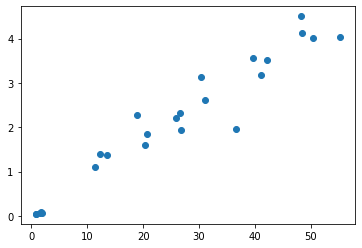

In [5]:
plt.scatter(Titer, Spec_prod)

In [6]:
Round1_summary.to_csv('Round0_Result_Summary_final.csv')